In [1]:
#librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [2]:
#función para la interpolación
def interpolation(face_vertices, num_points=100):
    # Obtén los vértices de la cara
    if len(face_vertices) == 3:
        v1, v2, v3 = face_vertices
        v4 = None
    else:
        v1, v2, v3, v4 = face_vertices
    # Crea una lista de puntos interpolados
    interpolated_points = []
    # Genera puntos intermedios a lo largo de los bordes de la cara

    for i in range(num_points):
        for j in range(num_points):
            # Calcula las coordenadas baricéntricas
            u = i / (num_points - 1)
            v = j / (num_points - 1)

            if v4 is None:
                w = 1 - u - v
                if u >= 0 and v >= 0 and w >= 0:
                   # Calcula las coordenadas 3D interpoladas para triangulos
                    x = u * v1[0] + v * v2[0] + w * v3[0]
                    y = u * v1[1] + v * v2[1] + w * v3[1]
                    z = u * v1[2] + v * v2[2] + w * v3[2]
            else:
                # Calcula las coordenadas 3D interpoladas para cuadriláteros
                x = (1 - u) * ((1 - v) * v1[0] + v * v4[0]
                               ) + u * ((1 - v) * v2[0] + v * v3[0])
                y = (1 - u) * ((1 - v) * v1[1] + v * v4[1]
                               ) + u * ((1 - v) * v2[1] + v * v3[1])
                z = (1 - u) * ((1 - v) * v1[2] + v * v4[2]
                               ) + u * ((1 - v) * v2[2] + v * v3[2])
            interpolated_points.append([x, y, z])

    return np.array(interpolated_points)


In [3]:
# Definir los vértices del prisma triangular
vertices_prisma = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [0.5, 0.866, 0],
    [0, 0, 1],
    [1, 0, 1],
    [0.5, 0.866, 1]
])

# Definir las caras del prisma
caras_prisma = [
    [vertices_prisma[0], vertices_prisma[1], vertices_prisma[2]],
    [vertices_prisma[3], vertices_prisma[4], vertices_prisma[5]],
    [vertices_prisma[0], vertices_prisma[1],
        vertices_prisma[4], vertices_prisma[3]],
    [vertices_prisma[1], vertices_prisma[2],
        vertices_prisma[5], vertices_prisma[4]],
    [vertices_prisma[2], vertices_prisma[0],
        vertices_prisma[3], vertices_prisma[5]]
]

phi = (1 + np.sqrt(5)) / 2  # Proporción áurea

vertices_icosaedro = np.array([
    [-1, phi, 0],
    [1, phi, 0],
    [-1, -phi, 0],
    [1, -phi, 0],
    [0, -1, phi],
    [0, 1, phi],
    [0, -1, -phi],
    [0, 1, -phi],
    [phi, 0, -1],
    [phi, 0, 1],
    [-phi, 0, -1],
    [-phi, 0, 1]
])

# Definición de las caras del icosaedro
caras_icosaedro = [
    [vertices_icosaedro[0], vertices_icosaedro[11], vertices_icosaedro[5]],
    [vertices_icosaedro[0], vertices_icosaedro[5], vertices_icosaedro[1]],
    [vertices_icosaedro[0], vertices_icosaedro[1], vertices_icosaedro[7]],
    [vertices_icosaedro[0], vertices_icosaedro[7], vertices_icosaedro[10]],
    [vertices_icosaedro[0], vertices_icosaedro[10], vertices_icosaedro[11]],
    [vertices_icosaedro[1], vertices_icosaedro[5], vertices_icosaedro[9]],
    [vertices_icosaedro[5], vertices_icosaedro[11], vertices_icosaedro[4]],
    [vertices_icosaedro[11], vertices_icosaedro[10], vertices_icosaedro[2]],
    [vertices_icosaedro[10], vertices_icosaedro[7], vertices_icosaedro[6]],
    [vertices_icosaedro[7], vertices_icosaedro[1], vertices_icosaedro[8]],
    [vertices_icosaedro[3], vertices_icosaedro[9], vertices_icosaedro[4]],
    [vertices_icosaedro[3], vertices_icosaedro[4], vertices_icosaedro[2]],
    [vertices_icosaedro[3], vertices_icosaedro[2], vertices_icosaedro[6]],
    [vertices_icosaedro[3], vertices_icosaedro[6], vertices_icosaedro[8]],
    [vertices_icosaedro[3], vertices_icosaedro[8], vertices_icosaedro[9]],
    [vertices_icosaedro[4], vertices_icosaedro[9], vertices_icosaedro[5]],
    [vertices_icosaedro[2], vertices_icosaedro[4], vertices_icosaedro[11]],
    [vertices_icosaedro[6], vertices_icosaedro[2], vertices_icosaedro[10]],
    [vertices_icosaedro[8], vertices_icosaedro[6], vertices_icosaedro[7]],
    [vertices_icosaedro[9], vertices_icosaedro[8], vertices_icosaedro[1]]
]

# Definir las caras del cubo
vertices_cubo = np.array([
    [-1.5, -1.5, -1.5],
    [1.5, -1.5, -1.5],
    [1.5, 1.5, -1.5],
    [-1.5, 1.5, -1.5],
    [-1.5, -1.5, 1.5],
    [1.5, -1.5, 1.5],
    [1.5, 1.5, 1.5],
    [-1.5, 1.5, 1.5]
])

# Definición de las caras del cubo
caras_cubo = [
    [vertices_cubo[0], vertices_cubo[1], vertices_cubo[2], vertices_cubo[3]],
    [vertices_cubo[4], vertices_cubo[5], vertices_cubo[6], vertices_cubo[7]],
    [vertices_cubo[0], vertices_cubo[1], vertices_cubo[5], vertices_cubo[4]],
    [vertices_cubo[1], vertices_cubo[2], vertices_cubo[6], vertices_cubo[5]],
    [vertices_cubo[2], vertices_cubo[3], vertices_cubo[7], vertices_cubo[6]],
    [vertices_cubo[3], vertices_cubo[0], vertices_cubo[4], vertices_cubo[7]]
]

In [4]:
op = int(input("""1. Prisma triangular
2. cubo
3. icosaedro
"""))

vertices = []

if op == 1:
    caras = caras_prisma
    vertices = vertices_prisma
elif op == 2:
    caras = caras_cubo
    vertices = vertices_cubo
else:
    caras = caras_icosaedro
    vertices = vertices_icosaedro


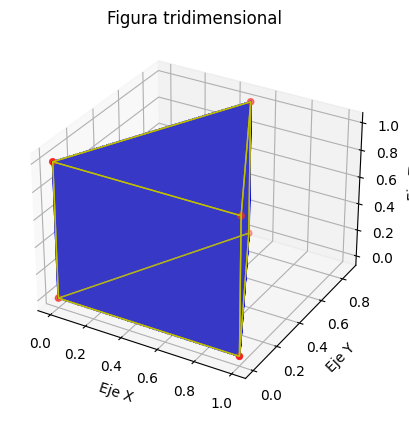

In [28]:
# Visualización de los vértices y las caras
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dibujar los vértices con rojo
ax.scatter(vertices[:, 0], vertices[:, 1],
           vertices[:, 2], c='r', marker='o')

# Dibujar las caras con amarillo y gris
ax.add_collection3d(Poly3DCollection(caras, facecolors='grey',
                    linewidths=1, edgecolors='y', alpha=.25))

# Realizar interpolación en cada cara del prisma
for i, cara in enumerate(caras):
    interpolados = interpolation(cara)  # Llama a la función de interpolación
    # pinta la superficie con azul
    ax.plot(interpolados[:, 0], interpolados[:, 1],
            interpolados[:, 2], label=f'Cara {i+1}', color='b')

# Configuración del gráfico
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
ax.set_title('Figura tridimensional')

# Mostrar el gráfico
plt.show()